In [1]:
# Importo algunas librerias que voy a necesitar
# coding: latin-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time #me sirve para medir tiempos de procesamiento

In [2]:
print('Primero busco leer tensores y poder plotear sus valores...')
# Base de datos a utilizar: archivo "eeg.dat" dentro de "Protocolo"
signals = pd.read_csv('C:/Users/Ariel/Desktop/ITBA/10_Cient_y_Geo/TP3/Protocolo/eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

Primero busco leer tensores y poder plotear sus valores...


In [3]:
print('Estructura de la informacion del archivo "eeg":')
print(signals.head()) #Veo primeras filas del archivo para ver como esta estructurado

#print('Filtrar segun informacion especifica:')
#print(signals[signals.counter > 45])

data = signals.values #Me permite pasar la base de datos a una matriz numerica

print('Ahora tenemos un tensor de numpy (data)')
print (data)

print('Forma %2d,%2d:' % (signals.shape)) #Veo que el archivo total tiene 339301 filas y 6 columnas

print('Python slicing...[:,].  El \':\' sirve para indicar el rango desde hasta.  Los indices son posiciones segun la forma del tensor.')
eeg = data[:,2] #Del electro me quedo con todas las filas y solo la segunda columna (la de counter)

Estructura de la informacion del archivo "eeg":
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0
Ahora tenemos un tensor de numpy (data)
[[1.65592476e+09 6.80000000e+01 3.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 6.90000000e+01 4.00000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.65592476e+09 7.00000000e+01 4.20000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.65592542e+09 1.40000000e+01 9.10000000e+01 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.50000000e+01 1.14000000e+02 4.10000000e+01
  2.60000000e+01 0.00000000e+00]
 [1.65592542e+09 1.60000000e+01 1.03000000e+02 4.10000

In [4]:
print(eeg)

# Ojo con el filtro OR.
eeg[eeg>80]
eegfiltered = np.logical_or(eeg>10,eeg<-40) 

[ 32.  40.  42. ...  91. 114. 103.]


Este es el plot del electrocardiograma completo (339301 observaciones):


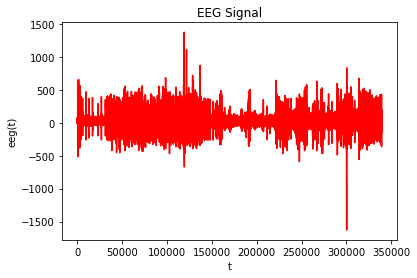

In [5]:
#Armo plot del electrocardiograma completo

#t = np.linspace(-0.02, 0.05, 1000)
#plt.plot(t, 325 * np.sin(2*np.pi*50*t));
plt.plot(eeg,'r', label='EEG')
plt.xlabel('t'); #defino label x para el grafico
plt.ylabel('eeg(t)'); #defino label y para el grafico
#plt.title(r'Plot of CT signal $x(t)=325 \sin(2\pi 50 t)$');
plt.title(r'EEG Signal')
#plt.ylim([-2000, 2000]);
#plt.xlim([0,len(eeg)])
print('Este es el plot del electrocardiograma completo (339301 observaciones):')
plt.show()

Este es el grafico utilizando el paquete seaborn:


KeyboardInterrupt: 

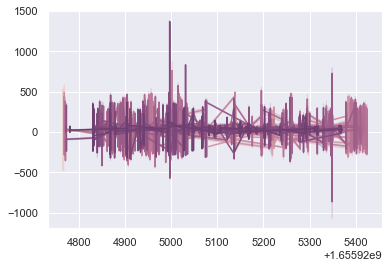

In [6]:
# Armado de graficos con seaborn (tarda algo mas en procesar)
print('Este es el grafico utilizando el paquete seaborn:')
import seaborn as sns
t0 = time()
sns.set(style="darkgrid")
sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
import matplotlib.pyplot as plt
plt.show()
t1 = time()
print('Tiempo que tarda en graficar los datos: {} s'.format(round(t1-t0,2)))

In [ ]:
#Tareas a seguir:
# Completar en caso que haya counters que no sean consecutivos. Esas filas deben ser el promedio de la anterior y la siguiente
# Identificar picos y valles del eef
#

File Length:339301
Some values from the dataset:

[[68 32  0  0  0]
 [69 40  0  0  0]
 [70 42  0  0  0]
 [71 34  0  0  0]
 [72 24  0  0  0]
 [73 28  0  0  0]
 [74 34  0  0  0]
 [75 35  0  0  0]
 [76 25  0  0  0]
 [77 22  0  0  0]]
Matrix dimension: (339301, 5)
EEG Vector Metrics

Length: 339300
Max value: 1380
Min value: -1628
Range: 3008
Average value: 31.00157382847038
Variance: 8274.169652695477
Std: 90.96246287725215


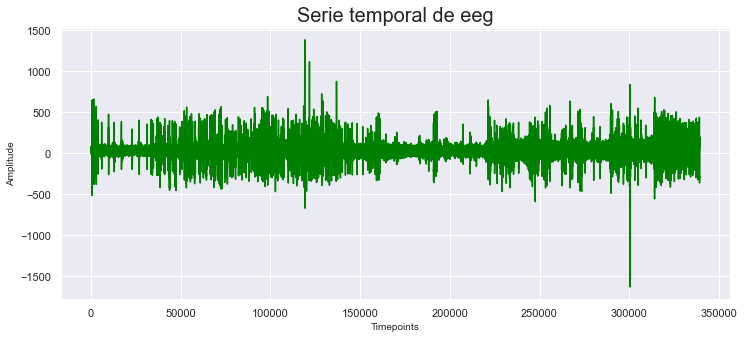

normality = NormaltestResult(statistic=72637.00951418822, pvalue=0.0)


C:\Users\Ariel\anaconda3\envs\mne3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


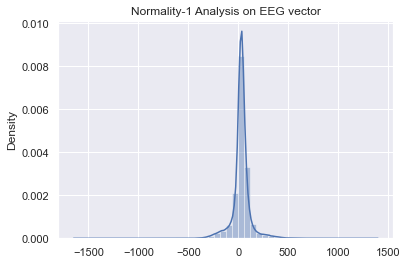

C:\Users\Ariel\anaconda3\envs\mne3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


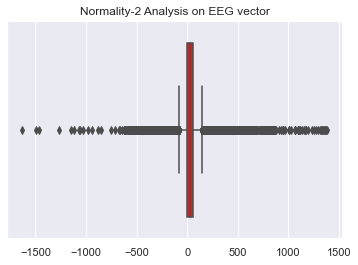

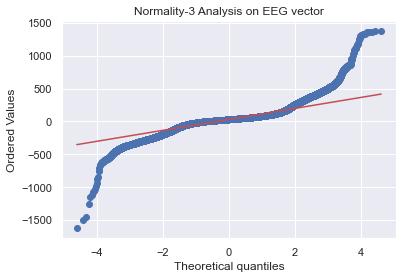

Upper Threshold: 303
Lower Threshold: -241


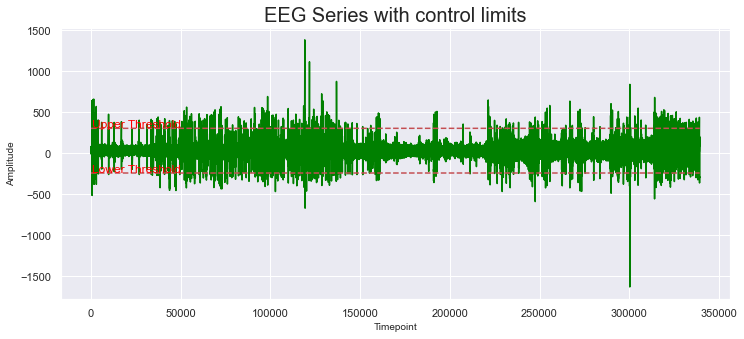

451
639
823
998
1207
1308
1496
1747
2122
2138
2560
2563
2903
3987
5935
9775
12912
16942
26850
31304
33402
33553
33698
33702
33872
33882
33886
33996
34162
34169
34177
34731
34737
36709
36713
36719
37076
37084
37093
37400
38054
38447
38451
39059
39064
40589
41071
42959
43726
43731
43740
45358
46311
46634
46647
46654
47109
47278
47284
47294
49424
49429
50636
50640
51978
52299
52305
52309
52313
52796
52801
53068
53270
53297
53533
53547
54598
54604
55024
55037
55348
55931
55976
55996
57647
58081
58089
59986
60279
60537
60857
60861
61419
62571
62576
62582
63329
63868
64280
64286
64627
64649
66453
66915
67085
67197
67297
67591
67598
67685
67792
67802
67809
68170
68183
68411
69114
71441
71735
71764
72438
72443
72465
72958
72964
74972
75638
75942
78904
78919
82148
82911
82914
83774
83783
85386
85393
86445
86451
89293
90907
90923
91127
91448
91453
93776
94335
94343
94908
95300
95766
95971
95975
95981
96235
96997
97315
98191
98217
98412
98424
98525
98625
98727
98733
98834
98932
99019
99119
100069

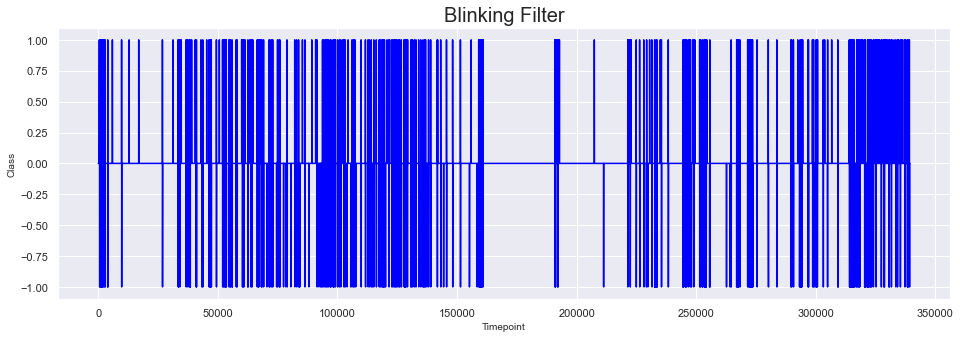

In [10]:
# Estudio potenciales casos de pestaneo
import csv
import math
import scipy
from scipy import stats

results = []

# Abro el archivo eeg.dat
with open('C:/Users/Ariel/Desktop/ITBA/10_Cient_y_Geo/TP3/Protocolo/eeg.dat') as inputfile:
    for row in csv.reader(inputfile):
        rows = row[0].split(' ')
        results.append(rows[1:])
        
        
# Convierto el archivo en un numpy array of ints.
results = np.asarray(results)
results = results.astype(int)


# Tomo solo la señal eeg
eeg = results[1:,1]


print('File Length:'+str(len(results)))
print("Some values from the dataset:\n")
print(results[0:10,])
print("Matrix dimension: {}".format(results.shape))
print("EEG Vector Metrics\n")
print("Length: {}".format(len(eeg)))
print("Max value: {}".format(eeg.max()))
print("Min value: {}".format(eeg.min()))
print("Range: {}".format(eeg.max()-eeg.min()))
print("Average value: {}".format(eeg.mean()))
print("Variance: {}".format(eeg.var()))
print("Std: {}".format(math.sqrt(eeg.var())))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoints",size=10)
plt.title("Serie temporal de eeg",size=20)
plt.show()


# Prueba de normalidad
print('normality = {}'.format(scipy.stats.normaltest(eeg)))
sns.distplot(eeg)
plt.title("Normality-1 Analysis on EEG vector")
plt.show()
sns.boxplot(eeg,color="red")
plt.title("Normality-2 Analysis on EEG vector")
plt.show()
res = stats.probplot(eeg, plot = plt)
plt.title("Normality-3 Analysis on EEG vector") 
plt.show()


# Encuentro el umbral para determinar que es pestaneo y que no.
umbral_superior=int(eeg.mean()+3*eeg.std())
print("Upper Threshold: {}".format(umbral_superior))
umbral_inferior=int(eeg.mean()-3*eeg.std())
print("Lower Threshold: {}".format(umbral_inferior))
plt.figure(figsize=(12,5))
plt.plot(eeg,color="green")
plt.plot(np.full(len(eeg),umbral_superior),'r--')
plt.plot(np.full(len(eeg),umbral_inferior),'r--')
plt.ylabel("Amplitude",size=10)
plt.xlabel("Timepoint",size=10)
plt.title("EEG Series with control limits",size=20)
plt.annotate("Upper Threshold",xy=(500,umbral_superior+10),color="red")
plt.annotate("Lower Threshold",xy=(500,umbral_inferior+10),color="red")
plt.show()

'''
Now the EEG data is filtered to produce a new output, assigning 1, greater than the upper limit, 0 between lower and upper
limit, and -1, under the lower limit.  In order to determine the number of valid events, changes from 0-1 will be counted
as a possible blinking event.
'''


filtro_eeg=[]
contador=0
for i in range(len(eeg)):
    if i==0:
        filtro_eeg.append(0)
    elif eeg[i]>umbral_superior:
        filtro_eeg.append(1)
        if eeg[i-1]<=umbral_superior:
            print(i)
            contador=contador+1
    elif eeg[i]<umbral_inferior:
        filtro_eeg.append(-1)
    else:
        filtro_eeg.append(0)
        
print("Blinking counter: {}".format(contador))
filtro_eeg=np.asarray(filtro_eeg)
plt.figure(figsize=(16,5))
plt.plot(filtro_eeg,color="blue")
plt.title("Blinking Filter",size=20)
plt.ylabel("Class",size=10)
plt.xlabel("Timepoint",size=10)
plt.show()

The Lag plot can be used to understand the correlation between consecutive time points.


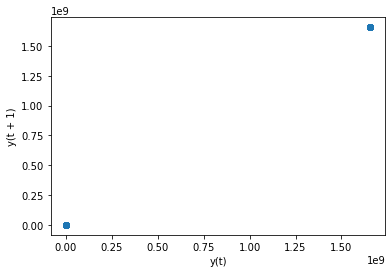

In [22]:
# Grafico para analizar si hay correlacion entre dos puntos consecutivos
signals = signals.astype('float32')
print('The Lag plot can be used to understand the correlation between consecutive time points.')
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(signals)
pyplot.show()

In [17]:
#Base de datos signals entendida como array
signals_array = np.asarray(signals)
signals_array

In [14]:
# Divido la muestra entre train y test

from sklearn.preprocessing import MinMaxScaler

# fix random seed for reproducibility
numpy.random.seed(7)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(signals)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(r'Cantidad de observaciones en train:',len(train),';',
      r'Cantidad de observaciones en test:',len(test))

Cantidad de observaciones en train: 227331 ; Cantidad de observaciones en test: 111970
